<a href="https://colab.research.google.com/github/aditsijoshi/SureStart2021/blob/main/Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@article{misra2019sarcasm,
  title={Sarcasm Detection using Hybrid Neural Network},
  author={Misra, Rishabh and Arora, Prahal},
  journal={arXiv preprint arXiv:1908.07414},
  year={2019}
}

@book{book,
author = {Misra, Rishabh and Grover, Jigyasa},
year = {2021},
month = {01},
pages = {},
title = {Sculpting Data for ML: The first act of Machine Learning},
isbn = {978-0-578-83125-1}
}

Quick notes about the algorithm below:
- tokenizer assigns each word in a sentence with an id
- embedding - is to representing natural language with FP numbers
- lstm - backbone of midel- used for sequences like sentences - long short term memory
- activation function for dense layers relu excpet of last layer excpet 
- model will learn patterns in data in dense- do not want to overfit 
- usually the number of paramemters are decreased
- loss function measures how well the model is learning


General Steps for future data processing algorithms:
- unzip, load data
- put in table form (pre-processing)
- np is just to put in array format
- tensor flow is for DL
- images would not need embedding
- sigmoid activation is for binary decisions


In [ ]:
import json

# reading data
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

# intializes a list called data to store data
data = list(parse_data('/content/Sarcasm_Headlines_Dataset_v2.json'))
print(data[0])

{'is_sarcastic': 1, 'headline': 'thirtysomething scientists unveil doomsday clock of hair loss', 'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'}


In [ ]:
# imports pandas database
import pandas as pd

# intializes pandas dataframe to store data
df = pd.DataFrame(data)
print(df.head())

   is_sarcastic  ...                                       article_link
0             1  ...  https://www.theonion.com/thirtysomething-scien...
1             0  ...  https://www.huffingtonpost.com/entry/donna-edw...
2             0  ...  https://www.huffingtonpost.com/entry/eat-your-...
3             1  ...  https://local.theonion.com/inclement-weather-p...
4             1  ...  https://www.theonion.com/mother-comes-pretty-c...

[5 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np

In [ ]:
# initlaizes input and output values
x = df['headline'].values
y = df['is_sarcastic'].values

# splits data into training and testing groups
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
x_test, x_validate, y_test, y_validate = train_test_split(x_test, y_test, test_size=0.50)

# prints shape of data
print(x_train.shape, x_test.shape, x_validate.shape, y_train.shape, y_test.shape, y_validate.shape)

(20033,) (4293,) (4293,) (20033,) (4293,) (4293,)


In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train) 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
max_sequence_train = max(len(x) for x in training_sequences)
training_padded = np.array([np.pad(x, (0, max_sequence_train - len(x))) for x in training_sequences])
#training_padded = sequence.pad_sequences(training_sequences, maxlen=100, padding="post", truncating="post")

val_sequences = tokenizer.texts_to_sequences(x_validate)
max_sequence_val = max(len(x) for x in val_sequences)
val_padded = np.array([np.pad(x, (0, max_sequence_val - len(x))) for x in val_sequences])
#val_padded = sequence.pad_sequences(val_sequences, maxlen=100, padding="post", truncating="post")

testing_sequences = tokenizer.texts_to_sequences(x_test)
max_sequence_test = max(len(x) for x in testing_sequences)
testing_padded = np.array([np.pad(x, (0, max_sequence_test - len(x))) for x in testing_sequences])
#testing_padded = sequence.pad_sequences(testing_sequences, maxlen=100, padding="post", truncating="post")


In [ ]:
training_padded = np.array(training_padded)
val_padded = np.array(val_padded)
testing_padded = np.array(testing_padded)
y_test = np.array(y_test)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(word_index) + 1, 2, input_shape=[None]),
        tf.keras.layers.LSTM(100, return_sequences=False),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(25, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 2)           51726     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               41200     
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

In [ ]:
# try with various optimizer and loss algorithms
# (SGD, MSE, 56), (Adam, MSE, 93), (Adam, BC, 97)
#model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])
model.compile(optimizer='SGD', loss='MSE', metrics=['accuracy'])

history = model.fit(training_padded, y_train, validation_data=(val_padded, y_validate), 
          epochs=15, verbose=1)

Epoch 1/15
627/627 [==============================] - 8s 10ms/step - loss: 0.2495 - accuracy: 0.5233 - val_loss: 0.2494 - val_accuracy: 0.5253
Epoch 2/15
627/627 [==============================] - 6s 9ms/step - loss: 0.2492 - accuracy: 0.5294 - val_loss: 0.2494 - val_accuracy: 0.5253
Epoch 3/15
627/627 [==============================] - 6s 9ms/step - loss: 0.2495 - accuracy: 0.5230 - val_loss: 0.2494 - val_accuracy: 0.5253
Epoch 4/15
627/627 [==============================] - 6s 9ms/step - loss: 0.2494 - accuracy: 0.5259 - val_loss: 0.2494 - val_accuracy: 0.5253
Epoch 5/15
627/627 [==============================] - 6s 9ms/step - loss: 0.2495 - accuracy: 0.5221 - val_loss: 0.2494 - val_accuracy: 0.5253
Epoch 6/15
627/627 [==============================] - 6s 9ms/step - loss: 0.2495 - accuracy: 0.5219 - val_loss: 0.2494 - val_accuracy: 0.5253
Epoch 7/15
627/627 [==============================] - 6s 9ms/step - loss: 0.2494 - accuracy: 0.5253 - val_loss: 0.2494 - val_accuracy: 0.5253
Epoch

In [ ]:
results = model.evaluate(testing_padded, y_test)
print("test loss, test acc:", results)

predictions = model.predict(testing_padded)
predictions = np.argmax(predictions, axis=1)

#print(predictions)

# I don't understand why this line of code does not work
print(sklearn.metrics.accuracy_score(y_test, predictions, normalize=True))

135/135 [==============================] - 1s 3ms/step - loss: 0.2492 - accuracy: 0.5281
test loss, test acc: [0.24924901127815247, 0.5280689597129822]
0.5280689494525973


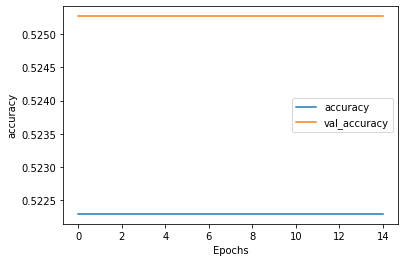

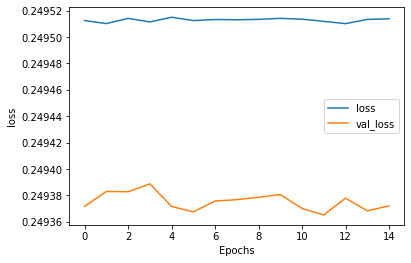

In [ ]:
import matplotlib.pyplot as plt

def plot_data(model_history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_data(history, "accuracy")
plot_data(history, "loss")
